## Importing the relevant packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()

## Importing the Data and Pre-processing 

In [ ]:
raw_csv_data = pd.read_csv("https://raw.githubusercontent.com/ecabestadistica/curso-series-temporales/master/6.%20Modelos%20MA%20medias%20m%C3%B3viles/Python/Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [ ]:
df_comp['market_value']=df_comp.ftse

In [ ]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

DF TEST

In [ ]:
sts.adfuller(df.market_value)

(-1.9041551418836864,
 0.33010893277028336,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '10%': -2.5670769326348926,
  '5%': -2.8621166146845334},
 54854.15304507557)

-1.9 esta por encima de los otros valores críticos, no rechamos ho.

Entonces No podemos decir que vengan de un proceso estacionario.
Entonces puede haber problema al usar este modelo aautorregresivo, ya que estos no son buenos con datos que no son estacionarios.

p valor es 0.33 es mayor 0.05

## Creating Returns

En estos casos que los datos no son estacionarios, en finanzas se hace una conversion a retorno.
Porcentaje de cambio entre valores consecutivos.

pct.change porcentaje de cambio, 1 significa 1 retorno, pero esto viene por defecto.Esto arrojaa una taasa 0 a 1 , 0,5, 0.6 etc. Si queremos verlo en porcentaje lo multiplicamos por 100 (mul(100).

Esto se  calcula asi cada fila (X(t)-X(t-1))*100/X(t)

In [ ]:
df['returns'] = df.market_value.pct_change(1).mul(100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.head()

,market_value,returns
date,,
1994-01-07,3445.98,NaN
1994-01-10,3440.58,-0.156704
1994-01-11,3413.77,-0.779229
1994-01-12,3372.02,-1.222988
1994-01-13,3360.01,-0.356166


faalta un valor porque como es un retorno de un díaa anterior, por eso para la primera fecha no hay vaalor

OJO: No ejecutar lo que sigue solo para observar como se quita la Primera filaa

Entonces como tenemos muchos datos, optaamos a eliminar la  primera fila (iloc(1:)

In [ ]:
df['returns'] = df.market_value.pct_change(1).mul(100)
df = df.iloc[1:]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.head()

,market_value,returns
date,,
1994-01-10,3440.58,-0.156704
1994-01-11,3413.77,-0.779229
1994-01-12,3372.02,-1.222988
1994-01-13,3360.01,-0.356166
1994-01-14,3400.56,1.206842


CONTINUAMOS CON LA EJECUCION

In [ ]:
sts.adfuller(df.returns[1:])

(-12.770265719497182,
 7.798058336040345e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '10%': -2.5670785949998973,
  '5%': -2.8621197374408225},
 15696.7672456975)

El estadistio es menor a los valores críticos. se puede rechazar la ho.
entonces es ahora estacionario

TAREA

## ACF for Returns

PREGUNTA 1, 2 Y 3

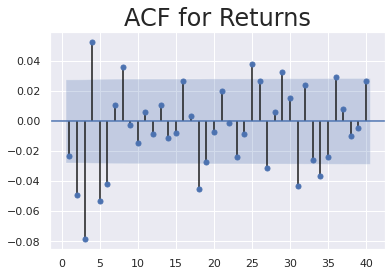

In [ ]:
sgt.plot_acf(df.returns[1:], zero = False, lags = 40)
plt.title("ACF for Returns", size=24)
plt.show()

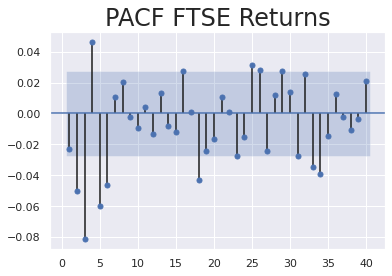

In [ ]:
sgt.plot_pacf(df.returns[1:], lags = 40, zero = False, method = ('ols'))
plt.title("PACF FTSE Returns", size=24)
plt.show()

Análisis del modelo AR(1) y de sus residuos.

In [ ]:
model_ar_1 = ARMA(df.returns[1:], order=(1,0))

In [ ]:
results_ar_1 = model_ar_1.fit()

In [ ]:
results_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood               -7929.749
Method:                       css-mle   S.D. of innovations              1.174
Date:                Fri, 24 Jul 2020   AIC                          15865.497
Time:                        03:17:33   BIC                          15885.061
Sample:                    01-10-1994   HQIC                         15872.353
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.159      0.247      -0.013       0.051
ar.L1.returns    -0.0230      0.014     -1.631      0.103      -0.051       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.4386           +0.0000j           43.4386            0.5000
-----------------------------------------------------------------------------
"""

p valor no significaativo, no se rechaza Ho, entonces el coeficiente es igual a 0

Analisis de residuos de modelo AR1

In [ ]:
df['res_price'] = results_ar_1.resid[1:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
sts.adfuller(df.res_price[2:])

(-12.802886436103307,
 6.695475244541121e-24,
 32,
 4986,
 {'1%': -3.43166220814716,
  '10%': -2.567078656914853,
  '5%': -2.862119853748156},
 15690.459504016972)

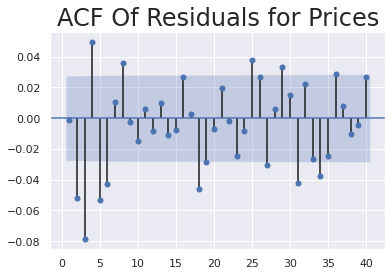

In [ ]:
sgt.plot_acf(df.res_price[2:], zero = False, lags = 40)
plt.title("ACF Of Residuals for Prices",size=24)
plt.show()

En el ACF de los residuos vemos varios puntos en la zona de significancia por lo que habria autocorrelación

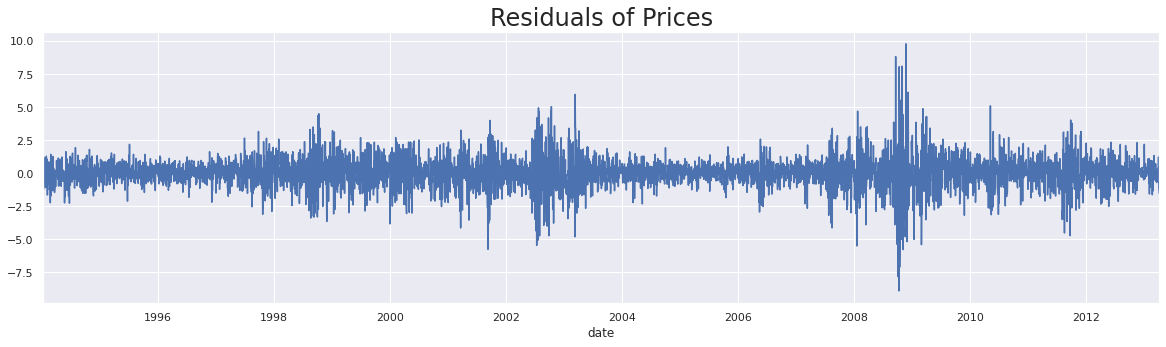

In [ ]:
df.res_price[2:].plot(figsize=(20,5))
plt.title("Residuals of Prices",size=24)
plt.show()

Se asemeja al ruido blanco

AR(2)

In [ ]:
model_ar_2 = ARMA(df.returns[1:], order=(2,0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood               -7923.456
Method:                       css-mle   S.D. of innovations              1.173
Date:                Fri, 24 Jul 2020   AIC                          15854.911
Time:                        04:36:11   BIC                          15880.996
Sample:                    01-10-1994   HQIC                         15864.052
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.220      0.222      -0.011       0.049
ar.L1.returns    -0.0242      0.014     -1.716      0.086      -0.052       0.003
ar.L2.returns    -0.0500      0.014     -3.550      0.000      -0.078      -0.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2417           -4.4635j            4.4701           -0.2586
AR.2           -0.2417           +4.4635j            4.4701            0.2586
-----------------------------------------------------------------------------
"""

Comparando modelo ar1 y ar2

In [ ]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [ ]:
LLR_test(results_ar_1, results_ar_2)

0.0

AR(3)

In [ ]:
model_ar_3 = ARMA(df.returns[1:], order=(3,0))
results_ar_3 = model_ar_3.fit()
print (results_ar_3.summary())
print ("LLR test: " + str(LLR_test(results_ar_2, results_ar_3)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 0)   Log Likelihood               -7906.738
Method:                       css-mle   S.D. of innovations              1.169
Date:                Fri, 24 Jul 2020   AIC                          15823.477
Time:                        05:17:27   BIC                          15856.083
Sample:                    01-10-1994   HQIC                         15834.902
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.330      0.184      -0.009       0.047
ar.L1.returns    -0.0283      0.014     -2.011      0.044      -0.056      -0.001
ar.L2.returns    -0.0521      0.014     

AR(4)

In [ ]:
model_ar_4 = ARMA(df.returns[1:], order=(4,0))
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()
print (results_ar_4.summary())
print ("LLR test: " + str(LLR_test(results_ar_3, results_ar_4)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(4, 0)   Log Likelihood               -7901.330
Method:                       css-mle   S.D. of innovations              1.168
Date:                Fri, 24 Jul 2020   AIC                          15814.661
Time:                        05:17:52   BIC                          15853.788
Sample:                    01-10-1994   HQIC                         15828.371
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.267      0.205      -0.010       0.048
ar.L1.returns    -0.0245      0.014     -1.739      0.082      -0.052       0.003
ar.L2.returns    -0.0496      0.014     

AR(5)

In [ ]:
model_ar_5 = ARMA(df.returns[1:], order=(5,0))
results_ar_5 = model_ar_5.fit()
results_ar_5.summary()
print (results_ar_5.summary())
print ("LLR test: " + str(LLR_test(results_ar_4, results_ar_5)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(5, 0)   Log Likelihood               -7892.390
Method:                       css-mle   S.D. of innovations              1.166
Date:                Fri, 24 Jul 2020   AIC                          15798.779
Time:                        05:18:18   BIC                          15844.428
Sample:                    01-10-1994   HQIC                         15814.775
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.348      0.178      -0.009       0.046
ar.L1.returns    -0.0217      0.014     -1.544      0.123      -0.049       0.006
ar.L2.returns    -0.0544      0.014     

AR(6)

In [ ]:
model_ar_6 = ARMA(df.returns[1:], order=(6,0))
results_ar_6 = model_ar_6.fit()
results_ar_6.summary()
print (results_ar_6.summary())
print ("LLR test: " + str(LLR_test(results_ar_5, results_ar_6)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(6, 0)   Log Likelihood               -7886.945
Method:                       css-mle   S.D. of innovations              1.164
Date:                Fri, 24 Jul 2020   AIC                          15789.890
Time:                        05:18:35   BIC                          15842.059
Sample:                    01-10-1994   HQIC                         15808.170
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.414      0.157      -0.007       0.045
ar.L1.returns    -0.0245      0.014     -1.740      0.082      -0.052       0.003
ar.L2.returns    -0.0523      0.014     

AR(7)

In [ ]:
model_ar_7 = ARMA(df.returns[1:], order=(7,0))
results_ar_7 = model_ar_7.fit()
results_ar_7.summary()
print (results_ar_7.summary())
print ("LLR test: " + str(LLR_test(results_ar_6, results_ar_7)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood               -7886.647
Method:                       css-mle   S.D. of innovations              1.164
Date:                Fri, 24 Jul 2020   AIC                          15791.294
Time:                        05:18:50   BIC                          15849.985
Sample:                    01-10-1994   HQIC                         15811.860
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.399      0.162      -0.008       0.045
ar.L1.returns    -0.0240      0.014     -1.702      0.089      -0.052       0.004
ar.L2.returns    -0.0517      0.014     

AR(8)

In [ ]:
model_ar_8 = ARMA(df.returns[1:], order=(8,0))
results_ar_8 = model_ar_8.fit()
results_ar_8.summary()
print (results_ar_8.summary())
print ("LLR test: " + str(LLR_test(results_ar_7, results_ar_8)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(8, 0)   Log Likelihood               -7885.599
Method:                       css-mle   S.D. of innovations              1.164
Date:                Fri, 24 Jul 2020   AIC                          15791.199
Time:                        05:19:09   BIC                          15856.410
Sample:                    01-10-1994   HQIC                         15814.050
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.370      0.171      -0.008       0.046
ar.L1.returns    -0.0242      0.014     -1.718      0.086      -0.052       0.003
ar.L2.returns    -0.0507      0.014     

Evaluamos los modelos

In [ ]:
print("LLR test: " + str(LLR_test(results_ar_2, results_ar_6, DF = 4)))

LLR test: 0.0
